# Discern Breast Cancer vetting Data science.
## By Implementing Ensemble learning.

## Imports.

In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
import re
import scipy as sp

## Read the CSV file.

In [51]:
data = pd.read_csv('data.csv')

In [52]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [53]:
data.shape

(569, 33)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [55]:
#columns present  
Columns = data.columns    
print(Columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


## Knowing the features.

In [56]:
# y includes our labels and x includes our features
# M or B Diagnosis (M = malignant, B = benign) 3-32)
# Unnamed is not nessesary.
y = data.diagnosis                           
list = ['Unnamed: 32','id',]
x = data.drop(list,axis = 1 )
x.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign:  357
Number of Malignant :  212


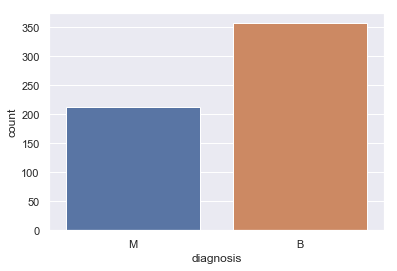

In [57]:
# Knowing the count of Cancerous and non-cancerous patients.
# M = 212, B = 357.
sns.set(style="darkgrid")
ax = sns.countplot(y,label="Count")       
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [58]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [59]:
x.isnull().sum()
x.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [60]:
x.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [61]:
x_corr=x.corr()
print(x_corr)
# Correlation coefficent.

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -

In [62]:
high_corr = x_corr.abs()
high_correlation_unstack=high_corr.unstack() 
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)
 
print(high_correlation_sort[30:35])
# This shows the most import atttributes which are correlated linked to each other in detemining a patient's Diagnosis.

radius_mean      perimeter_mean     0.997855
perimeter_mean   radius_mean        0.997855
radius_worst     perimeter_worst    0.993708
perimeter_worst  radius_worst       0.993708
radius_mean      area_mean          0.987357
dtype: float64


## Data Density Distribution.

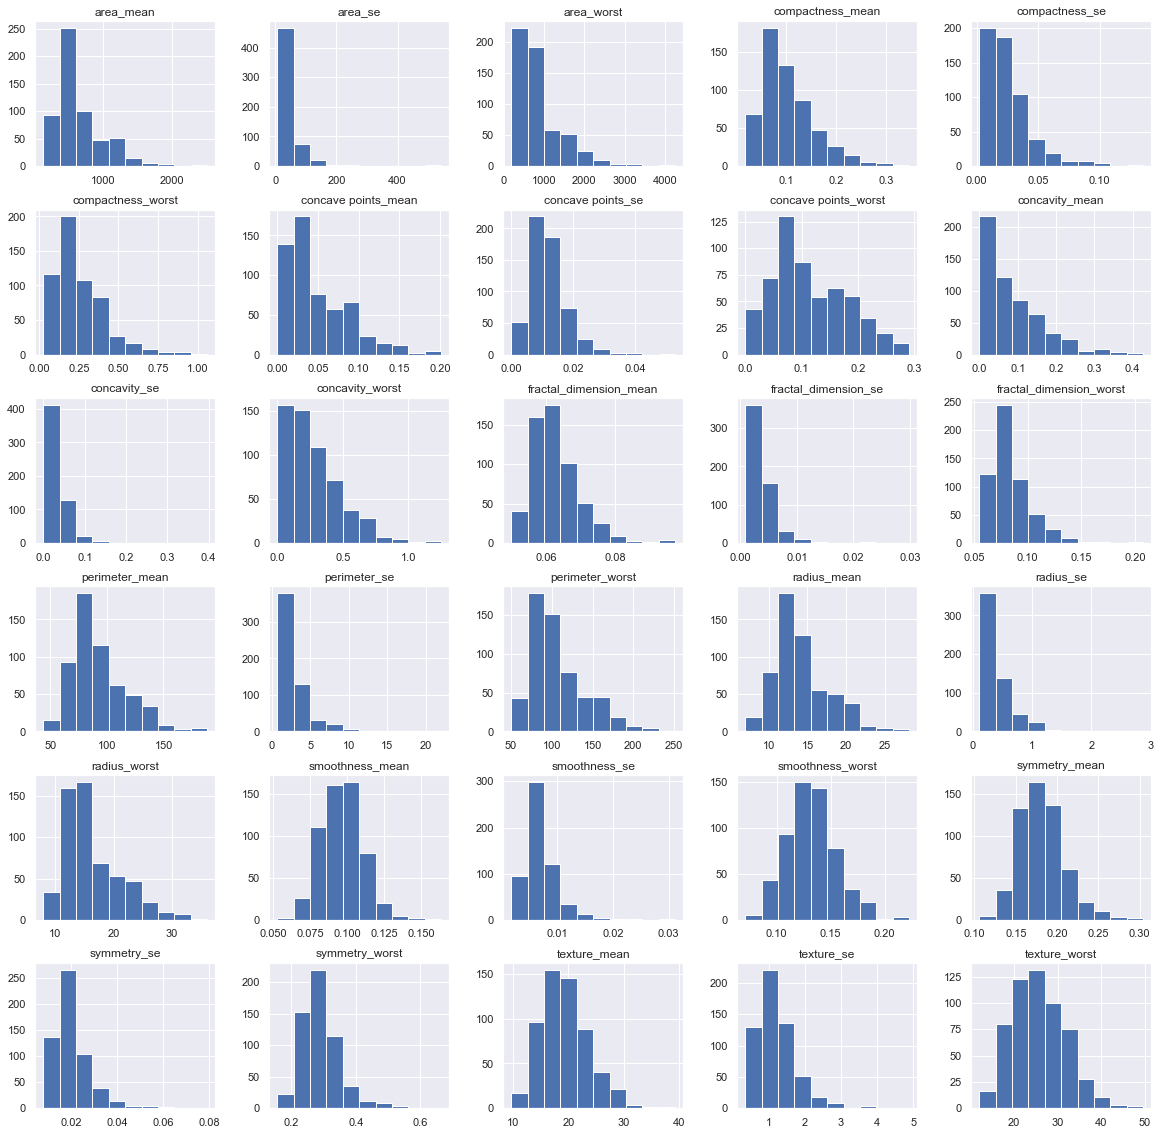

In [63]:
# Histograms for each variables/Attributes present in the data.
x.hist(figsize = (20, 20))
plt.show()

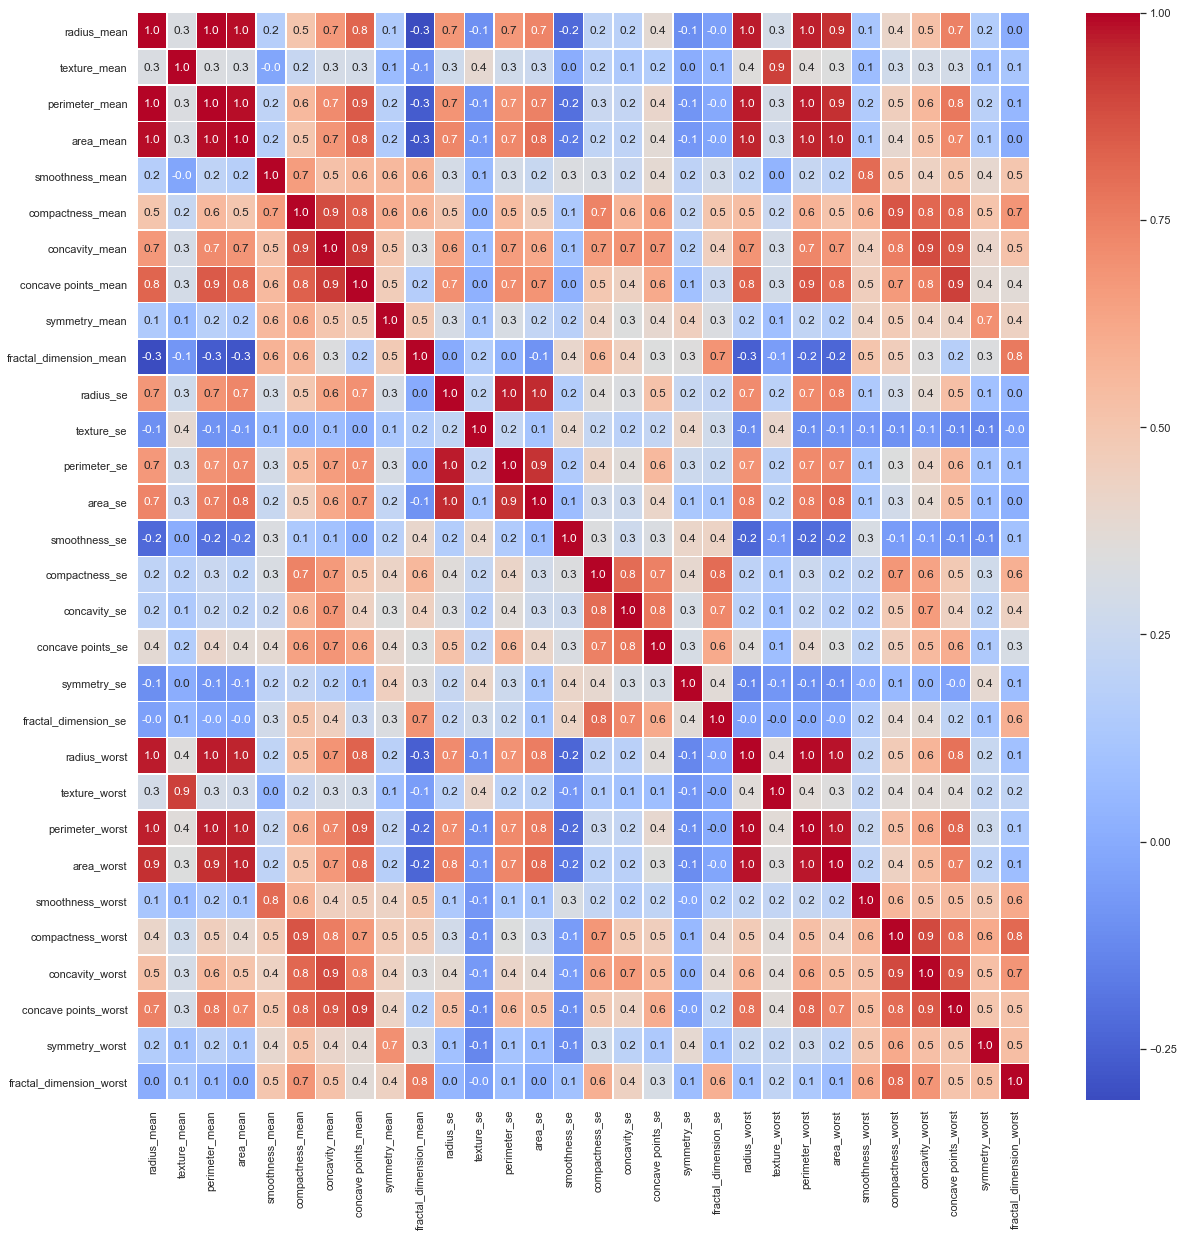

In [64]:
# Showing the correlation coefficient between the attributes.
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap= 'coolwarm')
plt.show()

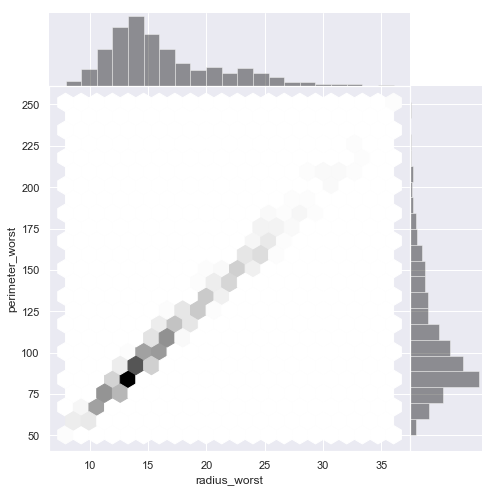

In [65]:
sns.jointplot("radius_worst", "perimeter_worst", data=x, kind="hex",space=0, color="black", height=7, ratio=5)
plt.show()

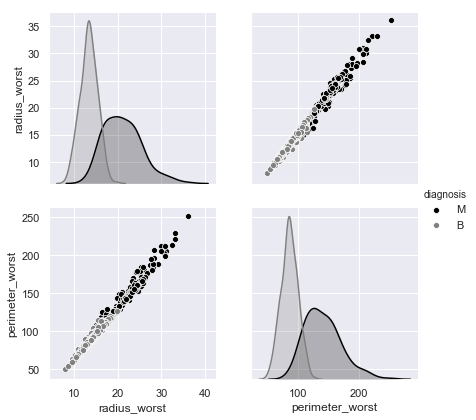

In [66]:
sns.pairplot(x, vars=["radius_worst", "perimeter_worst"],palette=sns.color_palette(['black', 'grey']), hue='diagnosis', height=3)
plt.show()

# MACHINE LEARNING
## Implemented model ENSEMBLE LEARNING

### Are the algorithms used in building the Ensemble model.
#### 1:Logistic Regression
#### 2:K nearest neighbors
#### 3:SVM using linear kernel
#### 4:Decision Tree
#### 5:Naive Bayes
#### 6:Random Forest
#### 7:Gradient boosting Classifier
#### 8:Votung Ensemble

### IMPORTS

In [67]:
import sklearn as sk
from sklearn import preprocessing, model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [68]:
Cancer_dataset = pd.read_csv('data.csv')
Cancer_dataset.dropna()
Cancer_dataset.replace('?',-99999,inplace=True)

In [69]:
Cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [70]:
# Getting our Features that is our x data
X_cancer = Cancer_dataset[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
                           'compactness_mean','concavity_mean','concave points_mean','texture_worst',
                           'perimeter_worst','area_worst','smoothness_worst','compactness_worst',
                           'concavity_worst','concave points_worst','symmetry_worst',
                           'fractal_dimension_worst']]

In [71]:
Y_cancer = Cancer_dataset['diagnosis']
# Getting our Features in y data

In [72]:
X_train,x_test,Y_train,y_test = train_test_split(X_cancer,Y_cancer)
# Train and test split

In [73]:
# Normalizing the data for creating different features
# normalizing is used when all the features are relatively close to the space 
# We are using MinMax Scaling here another one is polynomial
scaler = MinMaxScaler().fit(X_train)
new_x_train = scaler.transform(X_train)
new_x_test = scaler.transform(x_test)
print('This is the normalized training data:/n',new_x_train[1:8])

This is the normalized training data:/n [[0.35207535 0.20098384 0.34800636 0.21111347 0.42584256 0.32367646
  0.18760544 0.20989066 0.26016729 0.30375019 0.16636355 0.38453411
  0.30057921 0.29992013 0.48591065 0.29331756 0.21382658]
 [0.6597094  0.50140548 0.68557805 0.51049841 0.57659083 0.69933566
  0.74367385 0.73260437 0.48803    0.64091837 0.40154345 0.45915605
  0.37965092 0.52707668 0.87353952 0.26887443 0.28656697]
 [0.15802925 0.1943078  0.14871122 0.07694592 0.38727339 0.10465037
  0.02371134 0.02731113 0.26766657 0.10314259 0.04908081 0.37859077
  0.05930863 0.03501597 0.08182131 0.21998817 0.1242949 ]
 [0.31042643 0.1243851  0.30177597 0.17934252 0.4292493  0.21200603
  0.15613871 0.23762425 0.19526969 0.24548035 0.12927645 0.48094829
  0.14554045 0.19089457 0.44261168 0.27833629 0.11511216]
 [0.62989256 0.12368236 0.63098611 0.4892895  0.4597883  0.38839805
  0.46391753 0.51838966 0.12056533 0.50694756 0.34157491 0.4373638
  0.17241513 0.31948882 0.55841924 0.15750049 0.1

In [74]:
print('This is the normalized testing data:/n',new_x_test[1:8])

This is the normalized testing data:/n [[0.38331204 0.52424455 0.37461129 0.2430965  0.48533885 0.26816656
  0.2893627  0.32569583 0.59792328 0.3525574  0.21254424 0.62622994
  0.2021034  0.32180511 0.52439863 0.21466588 0.25803489]
 [0.16560178 0.14617006 0.16377583 0.08063627 0.43375106 0.28052873
  0.14843018 0.11023857 0.26189789 0.15439016 0.0627212  0.40632636
  0.26419652 0.23474441 0.31993127 0.28681254 0.27167782]
 [0.19399877 0.28144765 0.20392509 0.09251326 0.71894391 0.67125539
  0.39573571 0.31645129 0.58638592 0.20593655 0.07936001 0.97226441
  0.88347838 0.67108626 0.86735395 0.51034891 0.55922865]
 [0.0575039  0.21152495 0.05473015 0.024772   0.28580119 0.13714814
  0.03720712 0.02940855 0.27314681 0.03411524 0.01400904 0.38651522
  0.10517992 0.05495208 0.08810997 0.30356791 0.12495081]
 [0.22807516 0.20238932 0.24324511 0.1223754  0.56685728 0.51578659
  0.38870665 0.36853877 0.40063455 0.20678321 0.09990661 0.44462788
  0.37053099 0.35974441 0.64089347 0.82968658 0.3

## 1:Logistic Regression.

In [75]:
clf = LogisticRegression() # clf = classifier.
clf.fit(new_x_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [76]:
print('The training accuracy of Logistic Regression is :',clf.score(new_x_train,Y_train))
print('The testing accuracy of Logistic Regression is :',clf.score(new_x_test,y_test))

The training accuracy of Logistic Regression is : 0.960093896713615
The testing accuracy of Logistic Regression is : 0.958041958041958


In [77]:
Y_pred7 = clf.predict(x_test)
cm7 = confusion_matrix(y_test, Y_pred7)
print("The confusion matrix of classifier6:\n",cm7)

The confusion matrix of classifier6:
 [[ 0 88]
 [ 0 55]]


## 2:KNN (K-nearest neighbours).

In [78]:
clf2 = KNeighborsClassifier(n_neighbors = 10)
clf2.fit(new_x_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [79]:
print('The training accuracy of KNN is :',clf2.score(new_x_train,Y_train))
print('The testing accuracy of KNN is :',clf2.score(new_x_test,y_test))

The training accuracy of KNN is : 0.9694835680751174
The testing accuracy of KNN is : 0.965034965034965


In [80]:
Y_pred6 = clf2.predict(x_test)
cm6 = confusion_matrix(y_test, Y_pred6)
print("The confusion matrix of classifier2:\n",cm6)

The confusion matrix of classifier2:
 [[ 0 88]
 [ 0 55]]


## 3:SVM (Support vector machine).

In [81]:
clf3 = SVC(kernel='linear',gamma=5)
clf3.fit(new_x_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
print('The training accuracy of SVM is :',clf3.score(new_x_train,Y_train))
print('The testing accuracy of SVM is :',clf3.score(new_x_test,y_test))

The training accuracy of SVM is : 0.9788732394366197
The testing accuracy of SVM is : 0.9790209790209791


In [83]:
Y_pred5 = clf3.predict(x_test)
cm5 = confusion_matrix(y_test, Y_pred5)
print("The confusion matrix of classifier3:\n",cm5)

The confusion matrix of classifier3:
 [[ 0 88]
 [ 0 55]]


## 4:Decision trees.

In [84]:
clf4 = DecisionTreeClassifier(max_depth=12)
clf4.fit(new_x_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
print('The training accuracy of Decision Tree is :',clf4.score(new_x_train,Y_train))
print('The testing accuracy of Decision Tree is :',clf4.score(new_x_test,y_test))

The training accuracy of Decision Tree is : 1.0
The testing accuracy of Decision Tree is : 0.916083916083916


In [86]:
Y_pred4 = clf4.predict(x_test)
cm4 = confusion_matrix(y_test, Y_pred4)
print("The confusion matrix of classifier4:\n",cm4)

The confusion matrix of classifier4:
 [[ 0 88]
 [ 0 55]]


## 5:Naive Bayes.

In [87]:
clf5 = GaussianNB()
clf5.fit(new_x_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
print('The training accuracy of Gaussian Naive Bayes is :',clf5.score(new_x_train,Y_train))
print('The testing accuracy of Gaussian Naive Bayes is :',clf5.score(new_x_test,y_test))

The training accuracy of Gaussian Naive Bayes is : 0.9295774647887324
The testing accuracy of Gaussian Naive Bayes is : 0.9440559440559441


In [89]:
Y_pred3 = clf5.predict(x_test)
cm3 = confusion_matrix(y_test, Y_pred3)
print("The confusion matrix of classifier5:\n",cm3)

The confusion matrix of classifier5:
 [[ 0 88]
 [ 0 55]]


## 6:Random forest.

In [90]:
clf6 = RandomForestClassifier(n_estimators = 15)
clf6.fit(new_x_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
print('The training accuracy of Random Forest is :',clf6.score(new_x_train,Y_train))
print('The testing accuracy of Random Forest is :',clf6.score(new_x_test,y_test))

The training accuracy of Random Forest is : 0.9976525821596244
The testing accuracy of Random Forest is : 0.951048951048951


In [92]:
Y_pred2 = clf6.predict(x_test)
cm2 = confusion_matrix(y_test, Y_pred2)
print("The confusion matrix of classifier6:\n",cm2)

The confusion matrix of classifier6:
 [[45 43]
 [ 1 54]]


## 7:Gradient Boosting.

In [93]:
clf7 = GradientBoostingClassifier(n_estimators = 10,learning_rate = 0.1)
clf7.fit(new_x_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [94]:
print('The training accuracy of Gradient Boosted Classifier is :',clf7.score(new_x_train,Y_train))
print('The testing accuracy of Gradient Boosted Classifier is :',clf7.score(new_x_test,y_test))

The training accuracy of Gradient Boosted Classifier is : 0.9906103286384976
The testing accuracy of Gradient Boosted Classifier is : 0.9230769230769231


In [95]:
boosting = GradientBoostingClassifier()
boosting.fit(new_x_train,Y_train)
 
print(f"Gradient boosting training set accuracy: {format(boosting.score(new_x_train,Y_train), '.4f')} ")
print(f"Gradient boosting testing set accuracy: {format(boosting.score(new_x_train,Y_train), '.4f')} ")

Gradient boosting training set accuracy: 1.0000 
Gradient boosting testing set accuracy: 1.0000 


In [96]:
max_boosting = GradientBoostingClassifier(max_depth=1)
max_boosting.fit(new_x_train,Y_train) 
print(f"Gradient boosting training set accuracy: {format(max_boosting.score(new_x_train,Y_train), '.4f')} ")
print(f"Gradient boosting testing set accuracy: {format(max_boosting.score(new_x_train,Y_train), '.4f')} ")

Gradient boosting training set accuracy: 0.9953 
Gradient boosting testing set accuracy: 0.9953 


In [97]:
Y_pred1 = clf7.predict(x_test)
cm1 = confusion_matrix(y_test, Y_pred1)
print("The confusion matrix of classifier7:\n",cm1)

The confusion matrix of classifier7:
 [[17 71]
 [ 1 54]]


In [98]:
#plt.scatter(new_x_train,Y_train)
#plt.plot(myline, mymodel(myline))
#plt.show()

## 8:Voting Ensemble

In [99]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
model4 = KNeighborsClassifier(n_neighbors = 10)
estimators.append(('Knn', model4))
model5 = GaussianNB()
estimators.append(('NB', model5))
model6 = RandomForestClassifier(n_estimators = 15)
estimators.append(('RFC', model6))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble,new_x_train,Y_train, cv=kfold)
print(results.mean())

0.9529346622369879


### Prediction Phase: